## Credit Card Fraud Detection - Task2

### Load transaction data

In [1]:
import pandas as pd
import numpy as np

# Read transaction data from log file
transaction_data = pd.read_csv("data/task2_data.csv", 
                               names = ["DateTime", "CardID", "TerminalID", "Amount", "Class"], 
                               parse_dates=['DateTime'],
                               dtype =  { u'CardID': str, u'TerminalID': str, u'Amount': int, u'Class': str})
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class
0,2018-06-10 12:25:00,144384397,004312,5986,0
1,2018-06-10 12:25:00,000033863,000067,676,0
2,2018-06-10 12:25:00,110129651,139901,2422,0
3,2018-06-10 12:25:00,003771302,149904,951,1
4,2018-06-10 12:25:00,127375987,007354,9550,1


### Exploratory Data Analysis

In [2]:
transaction_data.shape

(23071, 5)

In [3]:
transaction_data.isnull().values.any()

False

Transaction dataset:
Number of fraudulents = 1242
Number of not fraudulents = 21829
Fraudulent ratio = 0.0538
Fraudulent percentege = 5.38%


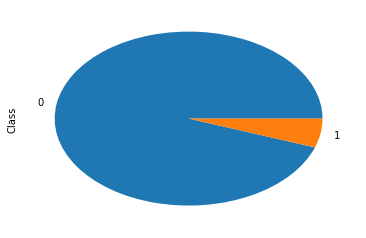

In [4]:
import matplotlib.pyplot as plt

# Calculate fraudulent transaction ratio 
number_of_observations = transaction_data.shape[0]
number_of_fraudulents = transaction_data[transaction_data["Class"] == '1'].shape[0]
number_of_not_fraudulents = number_of_observations - number_of_fraudulents
fraudulent_ratio = number_of_fraudulents / float(number_of_observations)

# Print statistical results
print("Transaction dataset:")
print('Number of fraudulents = {0}'.format(number_of_fraudulents))
print('Number of not fraudulents = {0}'.format(number_of_not_fraudulents))
print('Fraudulent ratio = {0:.4f}'.format(fraudulent_ratio)) 
print('Fraudulent percentege = {0:.2f}%'.format(fraudulent_ratio * 100)) 

# Plot class distributions
number_of_is_attributed = transaction_data["Class"].value_counts()
number_of_is_attributed.plot(kind='pie')
plt.show()

In [5]:
normal_transaction_data = transaction_data[transaction_data["Class"] == '0']
normal_transaction_data["Amount"].describe()

count    21829.000000
mean      2644.311650
std       3914.479398
min          0.000000
25%        441.000000
50%        879.000000
75%       3587.000000
max      29902.000000
Name: Amount, dtype: float64

In [6]:
fraud_transaction_data = transaction_data[transaction_data["Class"] == '1']
fraud_transaction_data["Amount"].describe()

count     1242.000000
mean      4738.752818
std       5901.052164
min          2.000000
25%        945.000000
50%        997.000000
75%       4967.000000
max      29926.000000
Name: Amount, dtype: float64

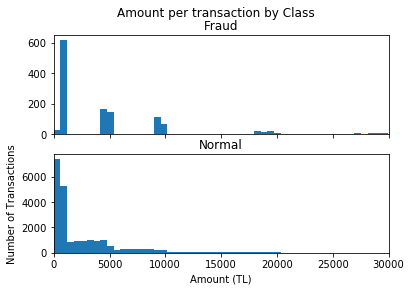

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')

bins = 50

ax1.hist(fraud_transaction_data.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal_transaction_data.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount (TL)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 30000))
plt.show();

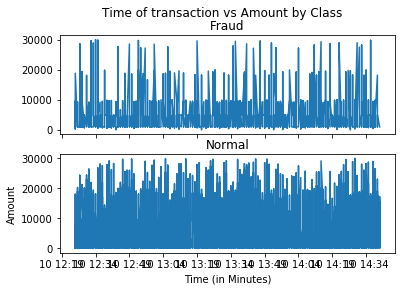

In [8]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by Class')

ax1.plot(fraud_transaction_data.DateTime, fraud_transaction_data.Amount)
ax1.set_title('Fraud')

ax2.plot(normal_transaction_data.DateTime, normal_transaction_data.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Minutes)')
plt.ylabel('Amount')
plt.show()

### Feature Extraction

In [9]:
# Parse Datetime column 

# Get year
transaction_data['year'] = transaction_data['DateTime'].dt.year.astype('uint16')

# Get month
transaction_data['month'] = transaction_data['DateTime'].dt.month.astype('uint8')

# Get day
transaction_data['day'] = transaction_data['DateTime'].dt.day.astype('uint8')

# Get hour
transaction_data['hour'] = transaction_data['DateTime'].dt.hour.astype('uint8')

# Get minute
transaction_data['minute'] = transaction_data['DateTime'].dt.minute.astype('uint8')

transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25


In [10]:
# Parse CardID column

# Get kind feature
# Debit = 0
# Credit = 1
transaction_data['CardKind'] = transaction_data['CardID'].str[0]

# Get limit feature
# Debit - max daily transaction (1000 TL) = 0
# Credit - monthly limit (5000 TL) = 1
# Credit - monthly limit (10000 TL) = 2
# Credit - monthly limit (20000 TL) = 3
# Credit - monthly limit (30000 TL) = 4
transaction_data['CardLimit'] = transaction_data['CardID'].str[1]

# Get home location feature
# International = 00
# State/Province = 01 ... 80
transaction_data['CardHomeLocation'] = transaction_data['CardID'].str.slice(2,4)

# Get customer no
transaction_data['CustomerNo'] = transaction_data['CardID'].str.slice(4,9)

transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,1,4,43,84397
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,0,0,00,33863
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,1,1,01,29651
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,0,0,37,71302
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,1,2,73,75987


In [11]:
# Parse TerminalID column

# Get kind feature
# ATM = 0
# POS = 1
transaction_data['TerminalKind'] = transaction_data['TerminalID'].str[0]

# Get merchant category feature
# ATM - Undefined = 0
# POS - Business type = 1 ... 5
transaction_data['TerminalMerchant'] = transaction_data['TerminalID'].str[1]

# Get location feature
# International = 00
# State/Province = 01 ... 80
# Internet = 99
transaction_data['TerminalLocation'] = transaction_data['TerminalID'].str.slice(2,4)

# Get terminal no
transaction_data['TerminalNo'] = transaction_data['TerminalID'].str.slice(4,6)

transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,TerminalNo
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,1,4,43,84397,0,0,43,12
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,0,0,00,33863,0,0,00,67
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,1,1,01,29651,1,3,99,01
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,0,0,37,71302,1,4,99,04
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,1,2,73,75987,0,0,73,54


In [12]:
transaction_data['SameLocation'] = transaction_data.apply(lambda x : 
                                                          1 if x["CardHomeLocation"] == x["TerminalLocation"] 
                                                          else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,TerminalNo,SameLocation
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,1,4,43,84397,0,0,43,12,1
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,0,0,00,33863,0,0,00,67,1
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,1,1,01,29651,1,3,99,01,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,0,0,37,71302,1,4,99,04,0
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,1,2,73,75987,0,0,73,54,1


In [13]:
transaction_data["InternationalTransaction"] = transaction_data.apply(lambda x : 
                                                                      1 if x["TerminalLocation"] == "00" 
                                                                      else 0, axis=1)
transaction_data["OnlineTransaction"] = transaction_data.apply(lambda x : 
                                                               1 if x["TerminalLocation"] == "99" 
                                                               else 0, axis=1)
transaction_data["LocalTransaction"] = transaction_data.apply(lambda x : 
                                                              1 if x["InternationalTransaction"] == 0 and x["OnlineTransaction"] == 0 
                                                              else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,CardHomeLocation,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,TerminalNo,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,...,43,84397,0,0,43,12,1,0,0,1
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,...,00,33863,0,0,00,67,1,1,0,0
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,...,01,29651,1,3,99,01,0,0,1,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,...,37,71302,1,4,99,04,0,0,1,0
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,...,73,75987,0,0,73,54,1,0,0,1


In [14]:
# Get only normal transactions
normal_transaction_data = transaction_data[transaction_data["Class"] == "0"]

# Calculate mean amount
mean_amount_normal_transaction = normal_transaction_data["Amount"].mean()
print('Amount(mean) = {0}'.format(mean_amount_normal_transaction))

# Find amount over average value
transaction_data['OverAverageAmount'] = np.where(transaction_data["Amount"] > mean_amount_normal_transaction, 1, 0)
transaction_data.head()

Amount(mean) = 2644.311649640387


,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,CustomerNo,TerminalKind,TerminalMerchant,TerminalLocation,TerminalNo,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,...,84397,0,0,43,12,1,0,0,1,1
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,...,33863,0,0,00,67,1,1,0,0,0
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,...,29651,1,3,99,01,0,0,1,0,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,...,71302,1,4,99,04,0,0,1,0,0
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,...,75987,0,0,73,54,1,0,0,1,1


In [15]:
mean_amount_normal_transaction_by_card_kind = normal_transaction_data.groupby("CardKind")["Amount"].apply(lambda x: np.mean(x))
print(mean_amount_normal_transaction_by_card_kind)

transaction_data['OverAverageCardKindAmount'] = transaction_data.apply(lambda x : 
                                                                       1 if x["Amount"] > mean_amount_normal_transaction_by_card_kind[x["CardKind"]] 
                                                                       else 0, axis=1)
transaction_data.head()

CardKind
0     498.762647
1    4788.877988
Name: Amount, dtype: float64


,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,TerminalKind,TerminalMerchant,TerminalLocation,TerminalNo,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,...,0,0,43,12,1,0,0,1,1,1
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,...,0,0,00,67,1,1,0,0,0,1
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,...,1,3,99,01,0,0,1,0,0,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,...,1,4,99,04,0,0,1,0,0,1
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,...,0,0,73,54,1,0,0,1,1,1


In [16]:
mean_amount_normal_transaction_by_terminal_kind = normal_transaction_data.groupby("TerminalKind")["Amount"].apply(lambda x: np.mean(x))
print(mean_amount_normal_transaction_by_terminal_kind)

transaction_data['OverAverageTerminalKindAmount'] = transaction_data.apply(lambda x : 
                                                                       1 if x["Amount"] > mean_amount_normal_transaction_by_terminal_kind[x["TerminalKind"]] 
                                                                       else 0, axis=1)
transaction_data.head()

TerminalKind
0    2649.551996
1    2640.641611
Name: Amount, dtype: float64


,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,TerminalMerchant,TerminalLocation,TerminalNo,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount,OverAverageTerminalKindAmount
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,...,0,43,12,1,0,0,1,1,1,1
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,...,0,00,67,1,1,0,0,0,1,0
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,...,3,99,01,0,0,1,0,0,0,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,...,4,99,04,0,0,1,0,0,1,0
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,...,0,73,54,1,0,0,1,1,1,1


In [18]:
mean_amount_normal_transaction_by_merchant = normal_transaction_data.groupby("TerminalMerchant")["Amount"].apply(lambda x: np.mean(x))
print(mean_amount_normal_transaction_by_merchant)

transaction_data['OverAverageMerchantAmount'] = transaction_data.apply(lambda x : 
                                                                       1 if x["Amount"] > mean_amount_normal_transaction_by_merchant[x["TerminalMerchant"]] 
                                                                       else 0, axis=1)
transaction_data.head()

TerminalMerchant
0    2649.551996
1    2475.255941
2    2739.990238
3    2654.418513
4    2667.648509
5    2665.899513
Name: Amount, dtype: float64


,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,TerminalLocation,TerminalNo,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount,OverAverageTerminalKindAmount,OverAverageMerchantAmount
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,...,43,12,1,0,0,1,1,1,1,1
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,...,00,67,1,1,0,0,0,1,0,0
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,...,99,01,0,0,1,0,0,0,0,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,...,99,04,0,0,1,0,0,1,0,0
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,...,73,54,1,0,0,1,1,1,1,1


In [19]:
mean_amount_normal_transaction_by_location = normal_transaction_data.groupby("TerminalLocation")["Amount"].apply(lambda x: np.mean(x))
print(mean_amount_normal_transaction_by_location)

transaction_data['OverAverageLocationAmount'] = transaction_data.apply(lambda x : 
                                                                       1 if x["Amount"] > mean_amount_normal_transaction_by_location[x["TerminalLocation"]] 
                                                                       else 0, axis=1)
transaction_data.head()

TerminalLocation
00    2644.412556
01    3004.069444
02    2863.009524
03    3147.261084
04    2287.602679
05    2515.777778
06    2394.784038
07    2748.457265
08    2652.214286
09    2640.181818
10    2845.098291
11    2169.101322
12    2906.289855
13    2678.816594
14    3425.483721
15    2764.388393
16    2597.214953
17    2907.270718
18    2535.004587
19    2278.196347
20    2452.780488
21    2769.686695
22    2449.616505
23    2393.695067
24    2556.207373
25    2711.403509
26    2905.605263
27    2802.210046
28    3269.981308
29    2574.076923
         ...     
52    2714.906103
53    2426.901345
54    2487.134884
55    2830.385650
56    2750.159292
57    2843.013333
58    2613.273973
59    3175.774510
60    2444.895197
61    2608.791667
62    2797.631336
63    2797.775701
64    2352.969298
65    2506.833333
66    2956.579909
67    2419.356164
68    3157.483254
69    2709.334821
70    2375.514768
71    2500.548117
72    2778.200000
73    1968.641860
74    2995.939130
75    2801.

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,TerminalNo,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount,OverAverageTerminalKindAmount,OverAverageMerchantAmount,OverAverageLocationAmount
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,...,12,1,0,0,1,1,1,1,1,1
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,...,67,1,1,0,0,0,1,0,0,0
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,...,01,0,0,1,0,0,0,0,0,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,...,04,0,0,1,0,0,1,0,0,0
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,...,54,1,0,0,1,1,1,1,1,1


In [20]:
transaction_data["WithdrawCashUseCreditCard"] = transaction_data.apply(lambda x : 
                                                              1 if x["CardKind"] == 1 and x["TerminalKind"] == 0 
                                                              else 0, axis=1)
transaction_data.head()

,DateTime,CardID,TerminalID,Amount,Class,year,month,day,hour,minute,...,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount,OverAverageTerminalKindAmount,OverAverageMerchantAmount,OverAverageLocationAmount,WithdrawCashUseCreditCard
0,2018-06-10 12:25:00,144384397,004312,5986,0,2018,6,10,12,25,...,1,0,0,1,1,1,1,1,1,0
1,2018-06-10 12:25:00,000033863,000067,676,0,2018,6,10,12,25,...,1,1,0,0,0,1,0,0,0,0
2,2018-06-10 12:25:00,110129651,139901,2422,0,2018,6,10,12,25,...,0,0,1,0,0,0,0,0,0,0
3,2018-06-10 12:25:00,003771302,149904,951,1,2018,6,10,12,25,...,0,0,1,0,0,1,0,0,0,0
4,2018-06-10 12:25:00,127375987,007354,9550,1,2018,6,10,12,25,...,1,0,0,1,1,1,1,1,1,0


In [21]:
credit_card_transaction_data = transaction_data[transaction_data["CardKind"] == "1"]
credit_card_transaction_data = credit_card_transaction_data.drop(["CardID", "TerminalID"], axis=1)
print(credit_card_transaction_data.shape)
credit_card_transaction_data.head()

(11524, 26)


,DateTime,Amount,Class,year,month,day,hour,minute,CardKind,CardLimit,...,SameLocation,InternationalTransaction,OnlineTransaction,LocalTransaction,OverAverageAmount,OverAverageCardKindAmount,OverAverageTerminalKindAmount,OverAverageMerchantAmount,OverAverageLocationAmount,WithdrawCashUseCreditCard
0,2018-06-10 12:25:00,5986,0,2018,6,10,12,25,1,4,...,1,0,0,1,1,1,1,1,1,0
2,2018-06-10 12:25:00,2422,0,2018,6,10,12,25,1,1,...,0,0,1,0,0,0,0,0,0,0
4,2018-06-10 12:25:00,9550,1,2018,6,10,12,25,1,2,...,1,0,0,1,1,1,1,1,1,0
6,2018-06-10 12:25:00,1413,0,2018,6,10,12,25,1,1,...,1,0,0,1,0,0,0,0,0,0
7,2018-06-10 12:25:00,5801,0,2018,6,10,12,25,1,2,...,0,0,0,1,1,1,1,1,1,0


In [22]:
list(credit_card_transaction_data.columns)

['DateTime',
 'Amount',
 'Class',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'CardKind',
 'CardLimit',
 'CardHomeLocation',
 'CustomerNo',
 'TerminalKind',
 'TerminalMerchant',
 'TerminalLocation',
 'TerminalNo',
 'SameLocation',
 'InternationalTransaction',
 'OnlineTransaction',
 'LocalTransaction',
 'OverAverageAmount',
 'OverAverageCardKindAmount',
 'OverAverageTerminalKindAmount',
 'OverAverageMerchantAmount',
 'OverAverageLocationAmount',
 'WithdrawCashUseCreditCard']

In [23]:
credit_card_transaction_data.to_csv('data/task3_data.csv', sep=',', index=False)